In [1]:
## Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.utils import check_random_state
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

In [3]:
%run SVR_LS_Library.ipynb

In [4]:
def mape_score(y_real, y_predict):
    return np.mean(np.abs((y_real - y_predict)/y_real))*100

In [5]:
### Boston

In [6]:
### Load data

In [7]:
rng = check_random_state(0)
boston = load_boston()
perm = rng.permutation(boston.target.size)
boston.data = boston.data[perm]
boston.target = boston.target[perm]

Y = boston.target
X = boston.data

In [8]:
#split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state = 5)

#normalize
scaler = MaxAbsScaler().fit(x_train1)
X_train = scaler.transform(x_train1); X_test = scaler.transform(x_test1)

scaler1 = MaxAbsScaler().fit(y_train1.reshape(-1, 1))
y_train = scaler1.transform(y_train1.reshape(-1, 1)).reshape(-1)
y_test = scaler1.transform(y_test1.reshape(-1, 1)).reshape(-1)

In [9]:
model = SVR_ls(C = 100000, kernel = "linear").fit(X_train, y_train)

In [10]:
predict = model.predict(X_train)
forecast = model.predict(X_test)

In [11]:
mapscortrain = mape_score(y_train, predict)
mapscortest = mape_score(y_test, forecast)
print(f"train score: {mapscortrain:.3},\n test score: {mapscortest:.3}")

train score: 16.9,
 test score: 15.4


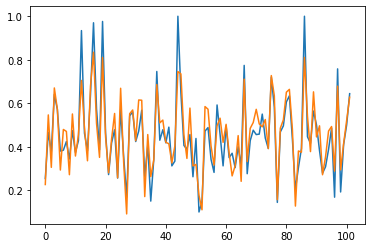

In [12]:
plt.plot(y_test)
plt.plot(forecast)

In [13]:
## Boston + genetic transformator

In [14]:
### Load data

In [15]:
rng = check_random_state(0)
boston = load_boston()
perm = rng.permutation(boston.target.size)
boston.data = boston.data[perm]
boston.target = boston.target[perm]

Y = boston.target
X_new = pd.read_csv("new_boston.csv").to_numpy()

In [16]:
#split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_new, Y, test_size=0.2, random_state = 5)

#normalize
scaler = MaxAbsScaler().fit(x_train1)
X_train = scaler.transform(x_train1); X_test = scaler.transform(x_test1)

scaler1 = MaxAbsScaler().fit(y_train1.reshape(-1, 1))
y_train = scaler1.transform(y_train1.reshape(-1, 1)).reshape(-1)
y_test = scaler1.transform(y_test1.reshape(-1, 1)).reshape(-1)

In [17]:
## fit

In [18]:
model = SVR_ls(C = 10, kernel = "rbf", gamma = 1).fit(X_train, y_train)

In [19]:
## Predict

In [20]:
predict = model.predict(X_train)
forecast = model.predict(X_test)

In [21]:
mapscortrain = mape_score(y_train, predict)
mapscortest = mape_score(y_test, forecast)
print(f"train score: {mapscortrain:.3},\n test score: {mapscortest:.3}")

train score: 7.91,
 test score: 10.5


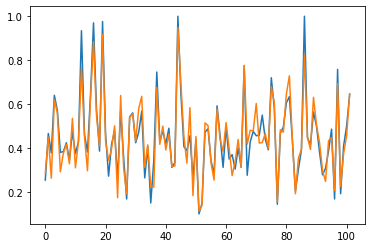

In [23]:
plt.plot(y_test)
plt.plot(forecast)

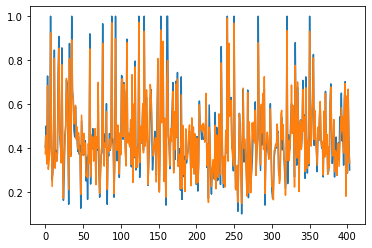

In [24]:
plt.plot(y_train)
plt.plot(predict)